In [1]:
import heeps
from heeps.util.psf_template import psf_template
import os.path
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

### Initialize wavefront

In [2]:
conf = dict(
    dir_output = 'test_APP',
    f_pupil = 'pupil/ELT_fullM1.fits',
    mode = 'APP',
    f_app_amp = 'optics/METIS_LMS_L_amp.fits',
    f_app_phase = 'optics/METIS_LMS_L_phase.fits',
    f_phase = 'wavefront/cfull/cube_Cfull_20220512_3600s_300ms_0piston_meters_scao_only_L_285.fits',
    add_phase = False,
    nframes = 1,
)
conf = heeps.config.read_config(**conf)
conf = heeps.config.update_config(**conf, verbose=True)
wf = heeps.pupil.pupil(**conf, verbose=True)

Simulation config: band=L, mode=APP
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   npupil=285, pscale=5.4700 mas, lam=3.8112E-06 m
   hfov=1.1 arcsec (-> ndet=403, 51.74 lam/D)

Entrance pupil: loaded from 'ELT_fullM1.fits'
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾


# 0. Off-axis PSF

Off-axis PSF:
‾‾‾‾‾‾‾‾‾‾‾‾‾
Create off-axis PSF cube
   apply APP stop from 'METIS_LMS_L_amp.fits'
   2022-06-22 03:33:32, e2e simulation using 12 cores
   2022-06-22 03:33:33, completed in 0.79 seconds

fwhm=3.6pix, PSF flux=0.239, PSF max=0.032


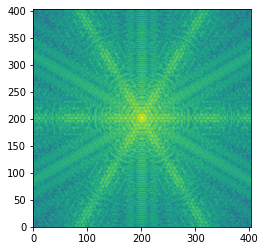

In [3]:
psf = heeps.wavefront.propagate(wf, **conf, onaxis=False, verbose=True)[0]
psf_crop, fwhm, ap_flux = psf_template(psf)
ap_flux_OFF = ap_flux
peak_OFF = np.max(psf_crop)
plt.imshow(np.log10(psf), origin='lower');
print('fwhm=%.1fpix, PSF flux=%.3f, PSF max=%.3f'%(fwhm, ap_flux, np.max(psf_crop)))

# 1. vAPP
### no SCAO residuals

On-axis PSF:
‾‾‾‾‾‾‾‾‾‾‾‾
Create on-axis PSF cube
   apply APP stop from 'METIS_LMS_L_amp.fits'
   apply APP phase from 'METIS_LMS_L_phase.fits'
   2022-06-22 03:33:33, e2e simulation using 12 cores
   2022-06-22 03:33:34, completed in 0.9 seconds

fwhm=3.6pix, PSF flux=0.156, PSF max=0.021
flux Strehl=65.26%, peak Strehl=63.77%


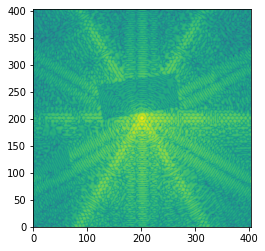

In [4]:
psf = heeps.wavefront.propagate(wf, **conf, verbose=True)[0]
psf_crop, fwhm, ap_flux = psf_template(psf)
plt.imshow(np.log10(psf), origin='lower');
fits.writeto(os.path.join(conf['dir_output'], 'APP_PSF_no_scao_METIS_LMS_L_phase.fits'), psf, overwrite=True)
print('fwhm=%.1fpix, PSF flux=%.3f, PSF max=%.3f'%(fwhm, ap_flux, np.max(psf_crop)))
print('flux Strehl=%.2f%%, peak Strehl=%.2f%%'%(ap_flux/ap_flux_OFF*100, np.max(psf_crop)/peak_OFF*100))

### with SCAO residuals

On-axis PSF:
‾‾‾‾‾‾‾‾‾‾‾‾
Load phase screens from 'cube_Cfull_20220512_3600s_300ms_0piston_meters_scao_only_L_285.fits'
   nscreens=1 (nframes=1, nstep=1)
Create on-axis PSF cube
   apply APP stop from 'METIS_LMS_L_amp.fits'
   apply APP phase from 'METIS_LMS_L_phase.fits'
   2022-06-22 03:33:34, e2e simulation using 12 cores
   2022-06-22 03:33:35, completed in 0.91 seconds

fwhm=3.6pix, PSF flux=0.152, PSF max=0.020
flux Strehl=63.54%, peak Strehl=62.04%


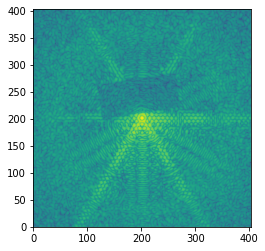

In [5]:
conf['add_phase'] = True
psf = heeps.wavefront.propagate(wf, **conf, verbose=True)[0]
psf_crop, fwhm, ap_flux = psf_template(psf)
plt.imshow(np.log10(psf), origin='lower');
fits.writeto(os.path.join(conf['dir_output'], 'APP_PSF_scao_only_METIS_LMS_L_phase.fits'), psf, overwrite=True)
print('fwhm=%.1fpix, PSF flux=%.3f, PSF max=%.3f'%(fwhm, ap_flux, np.max(psf_crop)))
print('flux Strehl=%.2f%%, peak Strehl=%.2f%%'%(ap_flux/ap_flux_OFF*100, np.max(psf_crop)/peak_OFF*100))

# 2. gvAPP (grating)
### no SCAO residuals

On-axis PSF:
‾‾‾‾‾‾‾‾‾‾‾‾
Create on-axis PSF cube
   apply APP stop from 'METIS_LMS_L_amp.fits'
   apply APP phase from 'METIS_LMS_L_phase_grating.fits'
   2022-06-22 03:33:36, e2e simulation using 12 cores
   2022-06-22 03:33:37, completed in 0.9 seconds



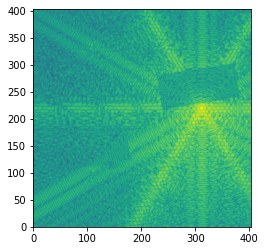

In [6]:
conf['f_app_phase'] = os.path.join(conf['dir_input'], 'optics/METIS_LMS_L_phase_grating.fits')
conf['add_phase'] = False
psf = heeps.wavefront.propagate(wf, **conf, verbose=True)[0]
plt.imshow(np.log10(psf), origin='lower');
fits.writeto(os.path.join(conf['dir_output'], 'APP_PSF_scao_only_METIS_LMS_L_phase_v2.fits'), psf, overwrite=True)

### with SCAO residuals

On-axis PSF:
‾‾‾‾‾‾‾‾‾‾‾‾
Load phase screens from 'cube_Cfull_20220512_3600s_300ms_0piston_meters_scao_only_L_285.fits'
   nscreens=1 (nframes=1, nstep=1)
Create on-axis PSF cube
   apply APP stop from 'METIS_LMS_L_amp.fits'
   apply APP phase from 'METIS_LMS_L_phase_grating.fits'
   2022-06-22 03:33:37, e2e simulation using 12 cores
   2022-06-22 03:33:38, completed in 0.9 seconds



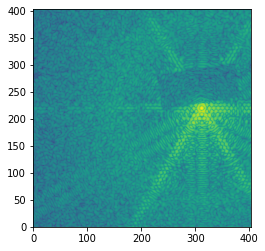

In [7]:
conf['add_phase'] = True
psf = heeps.wavefront.propagate(wf, **conf, verbose=True)[0]
plt.imshow(np.log10(psf), origin='lower');
fits.writeto(os.path.join(conf['dir_output'], 'APP_PSF_scao_only_METIS_LMS_L_phase_grating_v2.fits'), psf, overwrite=True)